In [257]:
import pandas as pd
import numpy as np
import seaborn as sns

In [258]:
data=pd.read_csv("Invistico_Airline.csv")
data.sample(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
57326,dissatisfied,disloyal Customer,26,Business travel,Eco,1685,4,0,4,4,...,4,3,1,3,4,5,3,3,34,28.0
27048,dissatisfied,Loyal Customer,63,Personal Travel,Eco Plus,2098,3,4,3,4,...,2,2,3,4,5,4,4,2,0,11.0
28136,satisfied,Loyal Customer,45,Personal Travel,Eco,970,4,4,4,4,...,4,5,5,5,5,5,5,3,0,1.0
64501,satisfied,Loyal Customer,51,Business travel,Business,2568,0,0,0,4,...,5,3,3,3,3,3,3,3,0,0.0
59385,dissatisfied,disloyal Customer,40,Business travel,Business,1870,4,4,4,3,...,5,4,4,4,4,3,4,4,4,0.0
87926,satisfied,Loyal Customer,41,Business travel,Business,3779,5,5,5,5,...,5,3,3,4,3,4,3,3,1,1.0
1302,satisfied,Loyal Customer,33,Personal Travel,Eco Plus,2133,4,0,4,3,...,4,4,4,5,5,4,5,4,0,0.0
49924,dissatisfied,disloyal Customer,20,Business travel,Eco,2034,2,4,2,1,...,2,2,4,3,4,5,5,2,5,0.0
79840,satisfied,Loyal Customer,25,Business travel,Business,3106,5,5,5,5,...,3,3,5,5,5,3,4,3,0,0.0
44044,dissatisfied,disloyal Customer,39,Business travel,Eco,1605,1,3,1,4,...,1,1,1,4,4,4,4,1,0,19.0


In [259]:
data["Class"].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [260]:
clean=data.dropna()
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

In [261]:
# convert categorical data into numericals
from sklearn.preprocessing import OneHotEncoder
clean["satisfaction"]=OneHotEncoder(drop='first').fit_transform(clean[["satisfaction"]]).toarray()
clean["Customer Type"]=OneHotEncoder(drop='first').fit_transform(clean[["Customer Type"]]).toarray()
clean["Type of Travel"]=OneHotEncoder(drop='first').fit_transform(clean[["Type of Travel"]]).toarray()
ordinal_mapping = {'Business': 3, 'Eco': 2, 'Eco Plus': 1}
clean['Class'] = clean['Class'].map(ordinal_mapping)

C:\Users\Jatin\AppData\Local\Temp\ipykernel_18836\4276875307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["satisfaction"]=OneHotEncoder(drop='first').fit_transform(clean[["satisfaction"]]).toarray()
C:\Users\Jatin\AppData\Local\Temp\ipykernel_18836\4276875307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["Customer Type"]=OneHotEncoder(drop='first').fit_transform(clean[["Customer Type"]]).toarray()
C:\Users\Jatin\AppData\Local\Temp\ipykernel_18836\4276875307.py:5: SettingWithCopyWarn

In [262]:
clean['Class'].value_counts()

3    61990
2    58117
1     9380
Name: Class, dtype: int64

In [252]:
clean.shape

(129487, 22)

In [184]:
sample_data=clean.sample(n=50)

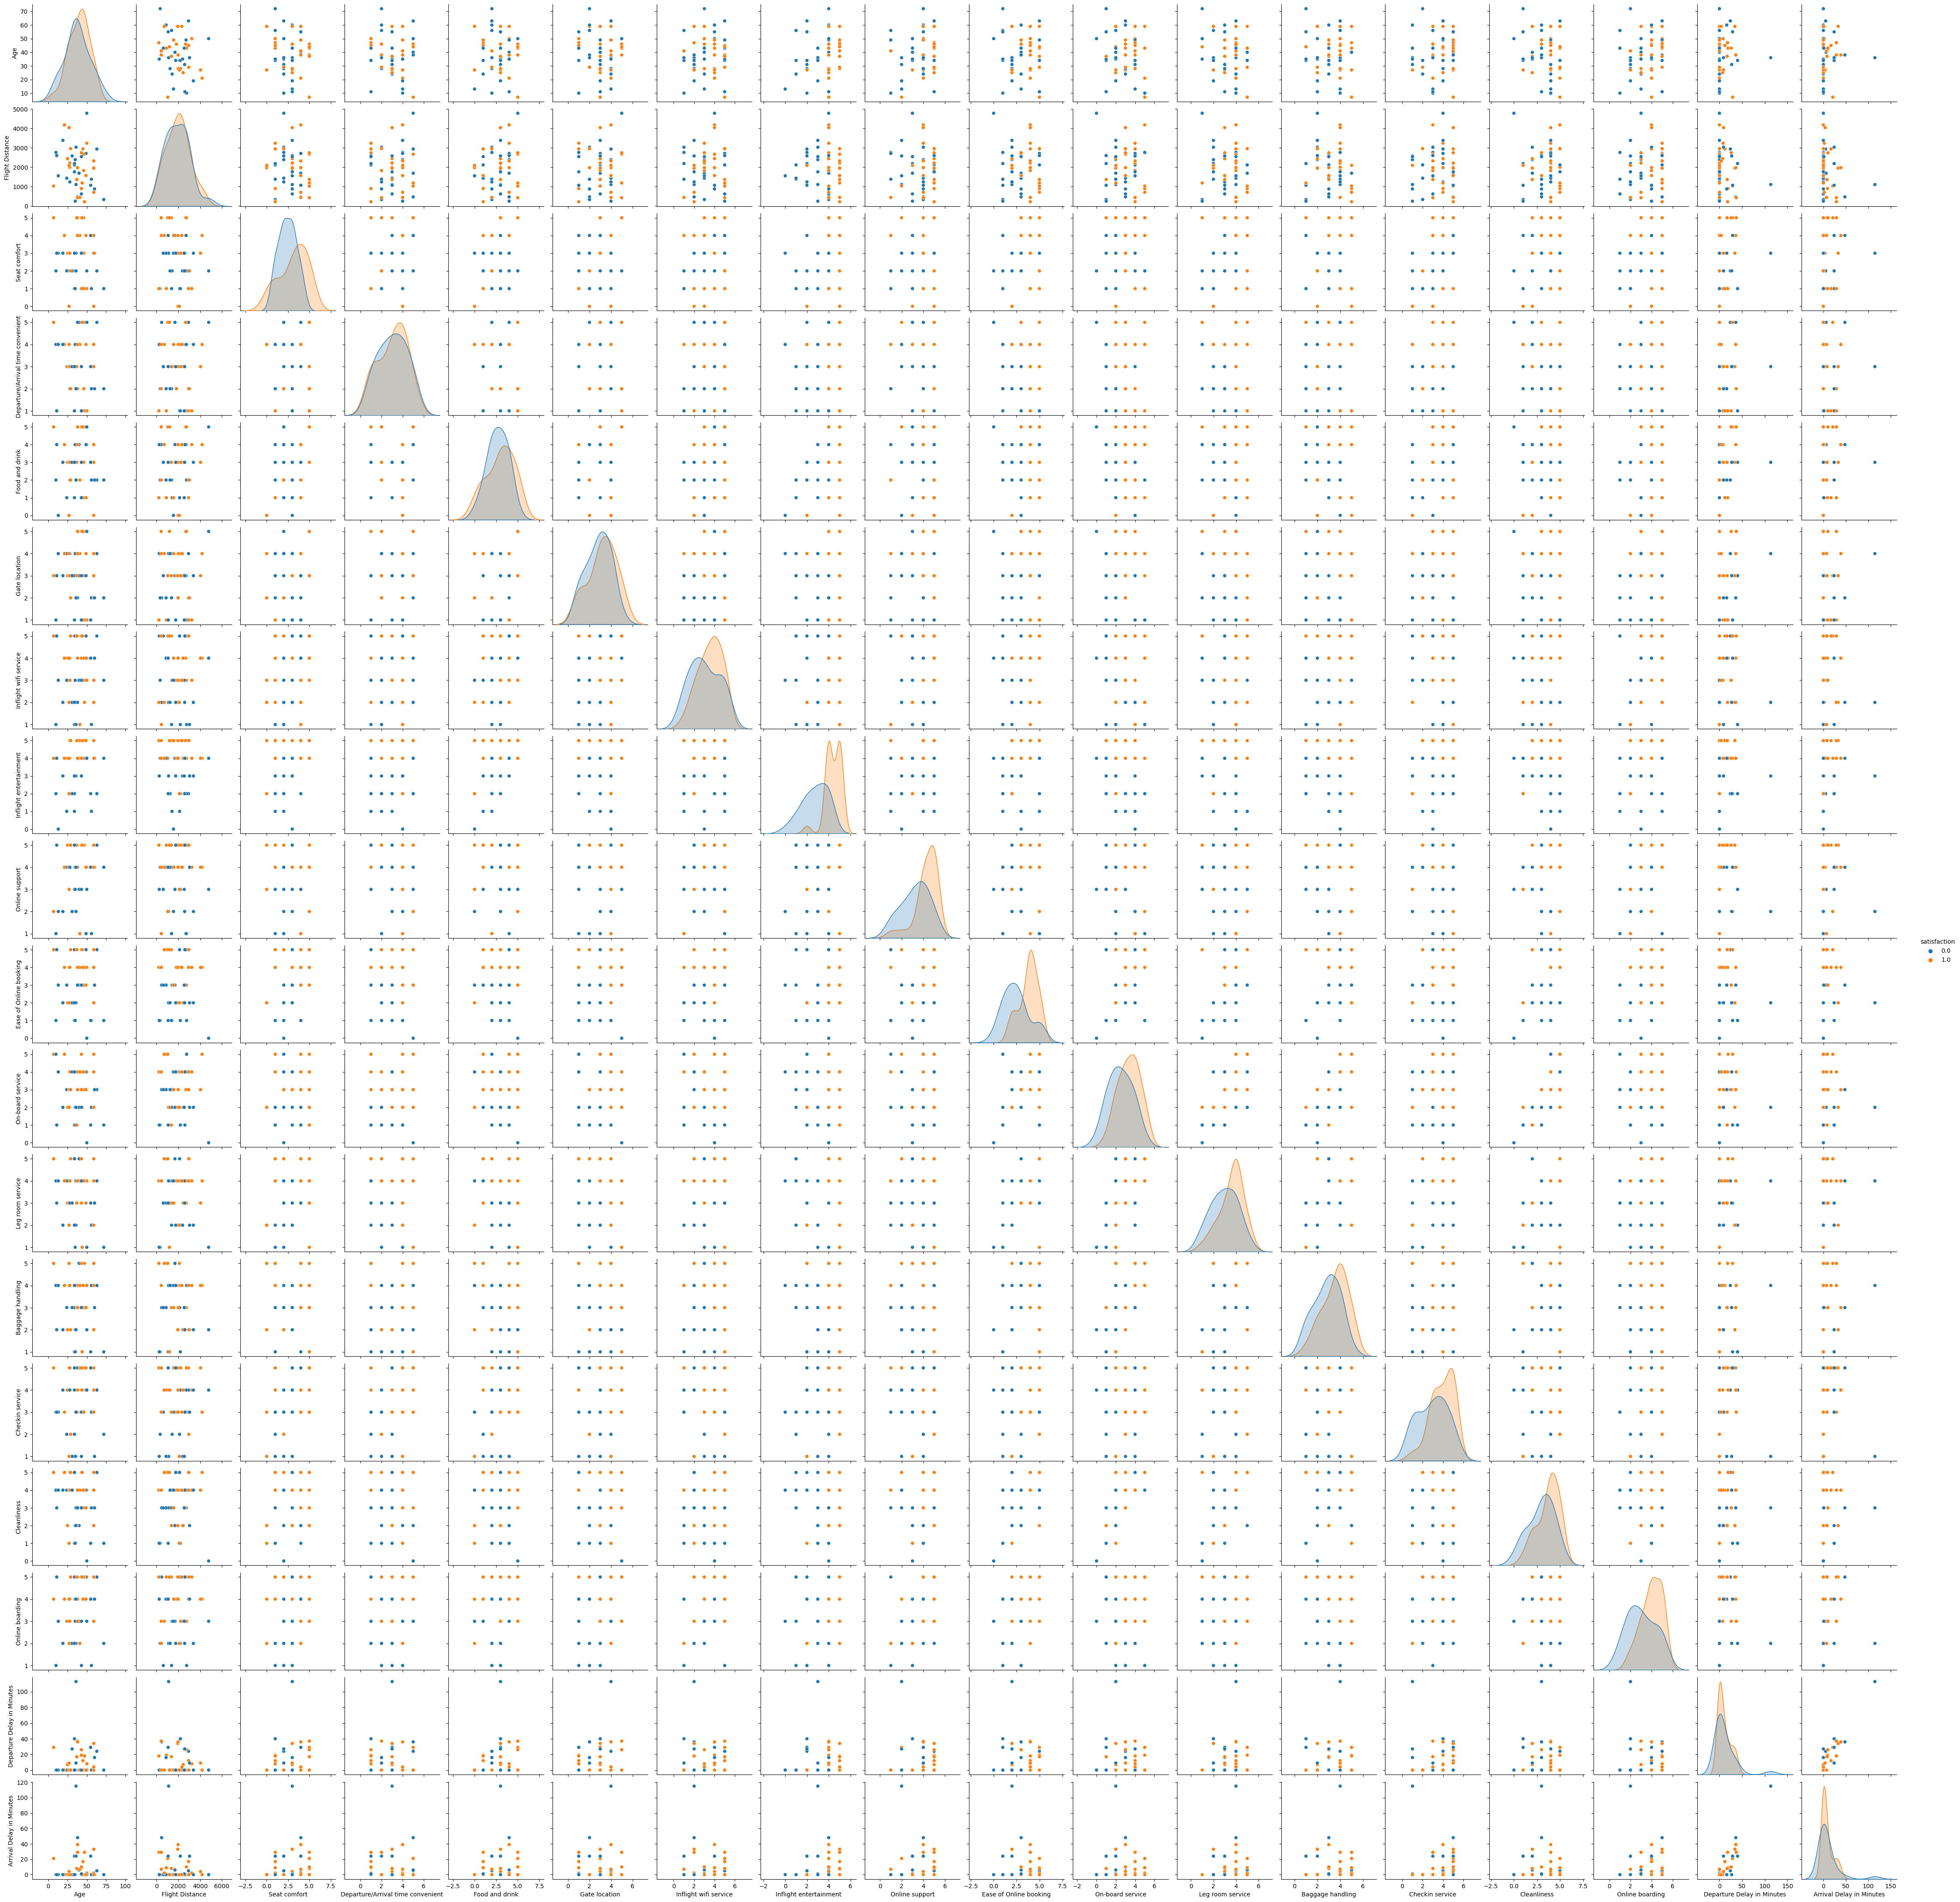

In [25]:
sns.pairplot(sample_data,hue="satisfaction")

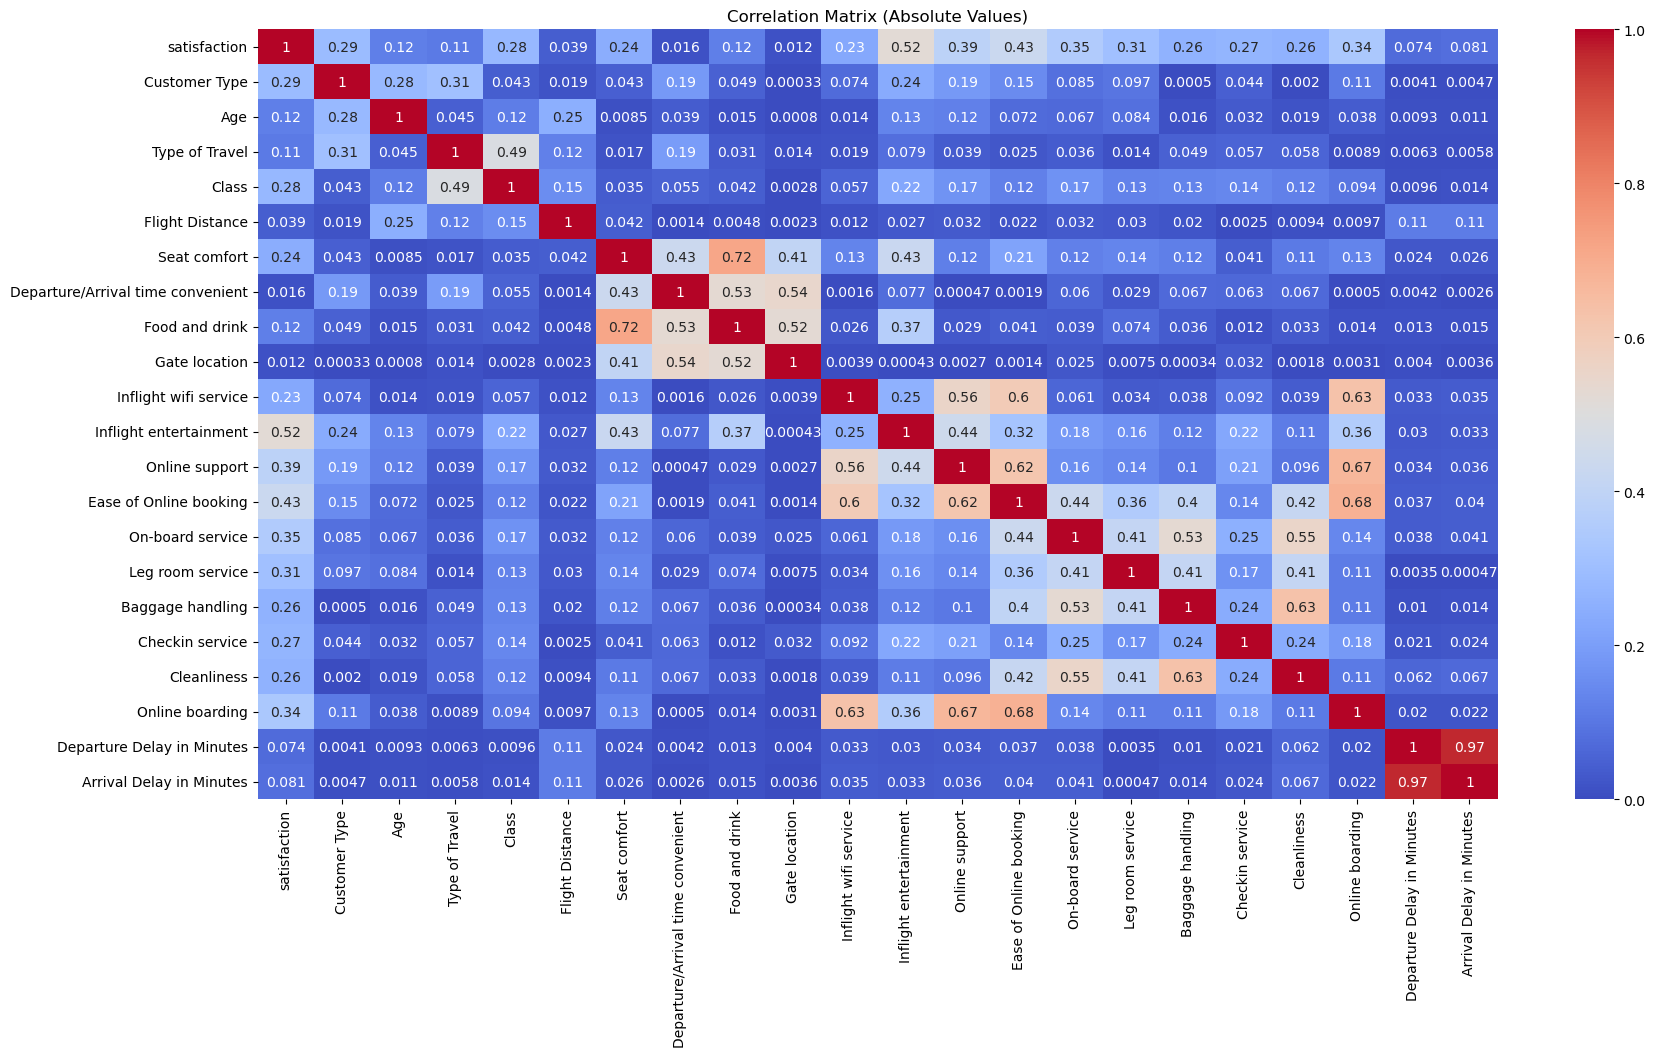

In [263]:
import matplotlib.pyplot as plt
corr_matrix = clean.corr().abs()
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix (Absolute Values)')
plt.show()

In [264]:
X = clean.drop("satisfaction", axis=1)
y = clean["satisfaction"]


In [265]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'clean' is your DataFrame

X = clean.drop("satisfaction", axis=1)
y = clean["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost":xgb.XGBClassifier()
}



for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Prediction
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # Training performance
    model_train_accuracy = accuracy_score(y_train, y_train_predict)
    model_train_precision = precision_score(y_train, y_train_predict, average='weighted')
    model_train_accuracy_f1score = f1_score(y_train, y_train_predict, average='weighted')
    model_train_accuracy_recall = recall_score(y_train, y_train_predict, average='weighted')

    # Testing performance
    model_test_accuracy = accuracy_score(y_test, y_test_predict)
    model_test_precision = precision_score(y_test, y_test_predict, average='weighted')
    model_test_accuracy_f1score = f1_score(y_test, y_test_predict, average='weighted')
    model_test_accuracy_recall = recall_score(y_test, y_test_predict, average='weighted')

    # Print model name
    print(f'Model: {model_name}\n')

    # Print training performance
    print('Training Performance:')
    print('   Accuracy: {:.4f}'.format(model_train_accuracy))
    print('   Precision: {:.4f}'.format(model_train_precision))
    print('   F1-score: {:.4f}'.format(model_train_accuracy_f1score))
    print('   Recall: {:.4f}'.format(model_train_accuracy_recall))

    print('\n---------------------------------------------------------------\n')

    # Print testing performance
    print('Testing Performance:')
    print('   Accuracy: {:.4f}'.format(model_test_accuracy))
    print('   Precision: {:.4f}'.format(model_test_precision))
    print('   F1-score: {:.4f}'.format(model_test_accuracy_f1score))
    print('   Recall: {:.4f}'.format(model_test_accuracy_recall))

    print('\n================================================================\n')

  

C:\Users\Jatin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression

Training Performance:
   Accuracy: 0.7249
   Precision: 0.7255
   F1-score: 0.7216
   Recall: 0.7249

---------------------------------------------------------------

Testing Performance:
   Accuracy: 0.7258
   Precision: 0.7272
   F1-score: 0.7226
   Recall: 0.7258


Model: RandomForest

Training Performance:
   Accuracy: 1.0000
   Precision: 1.0000
   F1-score: 1.0000
   Recall: 1.0000

---------------------------------------------------------------

Testing Performance:
   Accuracy: 0.9565
   Precision: 0.9568
   F1-score: 0.9566
   Recall: 0.9565


Model: Decision Tree

Training Performance:
   Accuracy: 1.0000
   Precision: 1.0000
   F1-score: 1.0000
   Recall: 1.0000

---------------------------------------------------------------

Testing Performance:
   Accuracy: 0.9359
   Precision: 0.9359
   F1-score: 0.9359
   Recall: 0.9359


Model: XGBoost

Training Performance:
   Accuracy: 0.9691
   Precision: 0.9693
   F1-score: 0.9691
   Recall: 0.9691

----

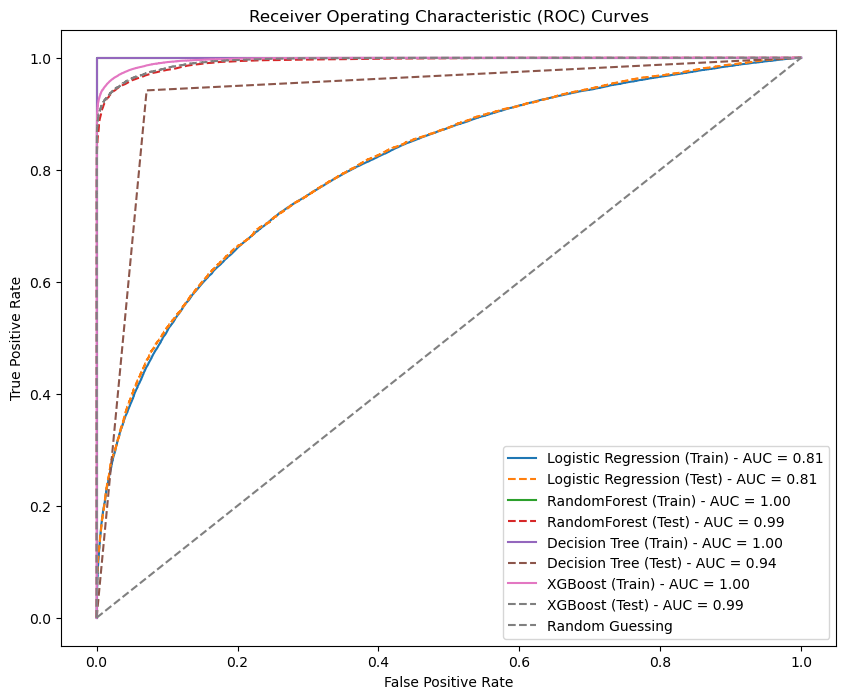

In [266]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a plot
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for model_name, model in models.items():
    # Get predicted probabilities for the positive class
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC for training set
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Compute ROC curve and AUC for testing set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve for training set
    plt.plot(fpr_train, tpr_train, label=f'{model_name} (Train) - AUC = {roc_auc_train:.2f}')

    # Plot ROC curve for testing set
    plt.plot(fpr_test, tpr_test, label=f'{model_name} (Test) - AUC = {roc_auc_test:.2f}', linestyle='dashed')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()

# Show the plot
plt.show()


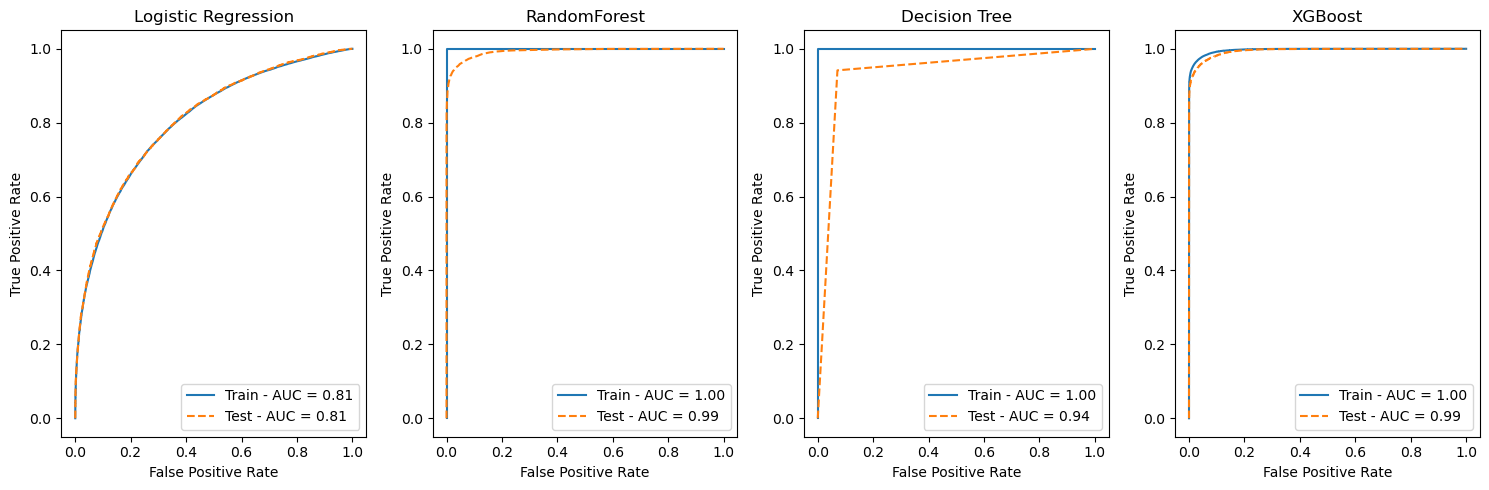

In [267]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

# Plot ROC curve for each model
for (model_name, model), ax in zip(models.items(), axes):
    # Get predicted probabilities for the positive class
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC for training set
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Compute ROC curve and AUC for testing set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve for training set
    ax.plot(fpr_train, tpr_train, label=f'Train - AUC = {roc_auc_train:.2f}')

    # Plot ROC curve for testing set
    ax.plot(fpr_test, tpr_test, label=f'Test - AUC = {roc_auc_test:.2f}', linestyle='dashed')

    # Set plot labels and title
    ax.set_title(model_name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
